In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('chess.csv')
data.head()

,game_id,rated,start_time,end_time,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1504210000000,1504210000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000,1504130000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1504130000000,1504130000000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1504110000000,1504110000000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1504030000000,1504030000000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   game_id         20058 non-null  object
 1   rated           20058 non-null  bool  
 2   start_time      20058 non-null  int64 
 3   end_time        20058 non-null  int64 
 4   turns           20058 non-null  int64 
 5   victory_status  20058 non-null  object
 6   winner          20058 non-null  object
 7   time_increment  20058 non-null  object
 8   white_id        20058 non-null  object
 9   white_rating    20058 non-null  int64 
 10  black_id        20058 non-null  object
 11  black_rating    20058 non-null  int64 
 12  moves           20058 non-null  object
 13  opening_eco     20058 non-null  object
 14  opening_name    20058 non-null  object
 15  opening_ply     20058 non-null  int64 
dtypes: bool(1), int64(6), object(9)
memory usage: 2.3+ MB


Opening_ECO: ECO stands for Encyclopedia of Chess Openings. It is a standardized code for any given chess opening. The chess openings are categorised into five broad areas ("A" through "E"), with each of those broken up into one hundred subcategories ("00" through "99"). The openings were published in five volumes of ECO, with volumes labeled "A" through "E".

In [4]:
#check the columnc in the data
data.columns

Index(['game_id', 'rated', 'start_time', 'end_time', 'turns', 'victory_status',
       'winner', 'time_increment', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [5]:
#check for missing data
data.isna().sum()

game_id           0
rated             0
start_time        0
end_time          0
turns             0
victory_status    0
winner            0
time_increment    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [6]:
data.set_index('game_id', inplace=True)

In [7]:
#describe the numeric data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
start_time,20058.0,1.483617e+12,2.850151e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504493e+12
end_time,20058.0,1.483618e+12,2.850140e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504494e+12
turns,20058.0,6.046600e+01,3.357058e+01,1.000000e+00,3.700000e+01,5.500000e+01,7.900000e+01,3.490000e+02
white_rating,20058.0,1.596632e+03,2.912534e+02,7.840000e+02,1.398000e+03,1.567000e+03,1.793000e+03,2.700000e+03
black_rating,20058.0,1.588832e+03,2.910361e+02,7.890000e+02,1.391000e+03,1.562000e+03,1.784000e+03,2.723000e+03
opening_ply,20058.0,4.816981e+00,2.797152e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,2.800000e+01


From this decriptive analysis we can see that the mean rating for white player is 1597 while for black players is 1589

Also, from the analysis above we can deduce that the turns column has a lot of outliers by merely looking at the mean, min, 25th, 75th and max data. 
The min no of moves is 1 while the max is 349 which is clearly very far apart. A closer look at the 25% and 75% show that the values are 37 and 79 turns respectively.

In [8]:
#create a duration column which is the subtraction of the start time from the end time
data['game_duration'] = data['end_time'] - data['start_time']

In [9]:
data.head()

,rated,start_time,end_time,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration
game_id,,,,,,,,,,,,,,,,
TZJHLljE,False,1504210000000,1504210000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0
l1NXvwaE,True,1504130000000,1504130000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,0
mIICvQHh,True,1504130000000,1504130000000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0
kWKvrqYL,True,1504110000000,1504110000000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,0
9tXo1AUZ,True,1504030000000,1504030000000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0


Key analyses </br>
-distribution of players by rating (black & white) </br>
-distribution of games by outcomes (hist, barshaart) </br>
-player rating (white & black) vs outcome </br>
-does higher rating correlate to winning?</br>
-most common opening</br>
-average turns per opening vs outcome</br>
-time increment vs player rating</br>
-common moves or patterns that lead to specific outcome</br>

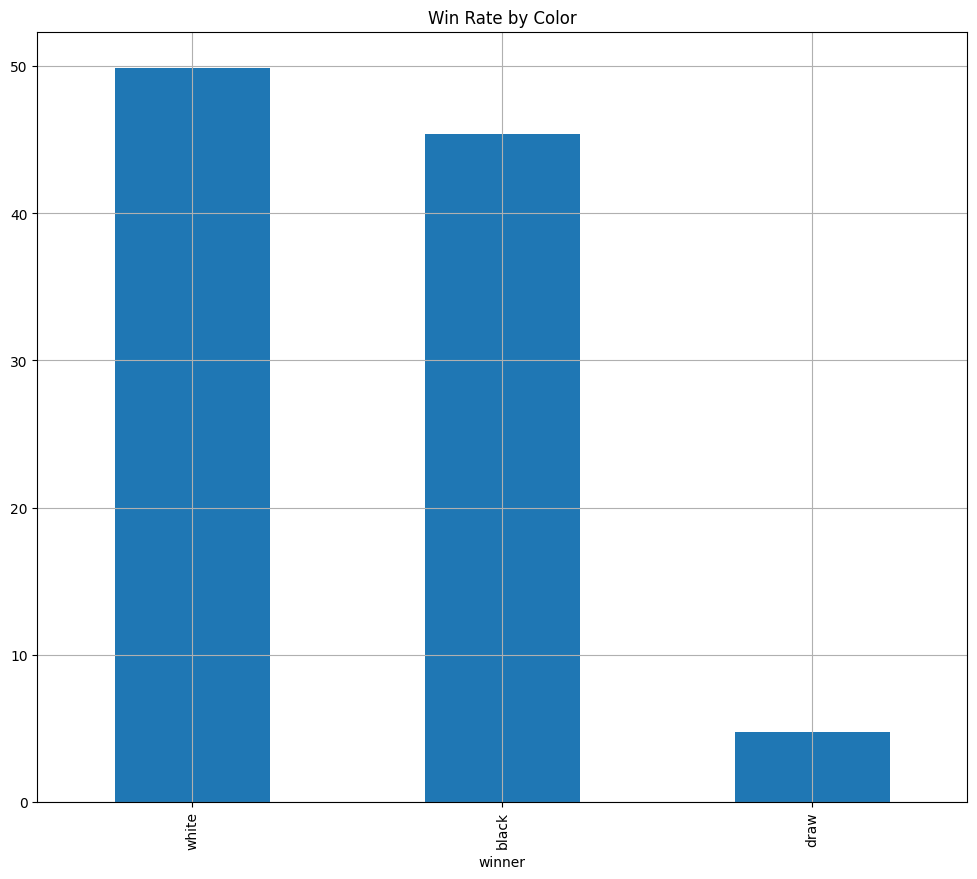

In [10]:
#win rate based on color
winners = data['winner'].value_counts(normalize=True) * 100
winners.plot(kind='bar', figsize=(12, 10))
plt.title("Win Rate by Color")
plt.grid(True)

In [11]:
print(winners)

winner
white    49.860405
black    45.403330
draw      4.736265
Name: proportion, dtype: float64


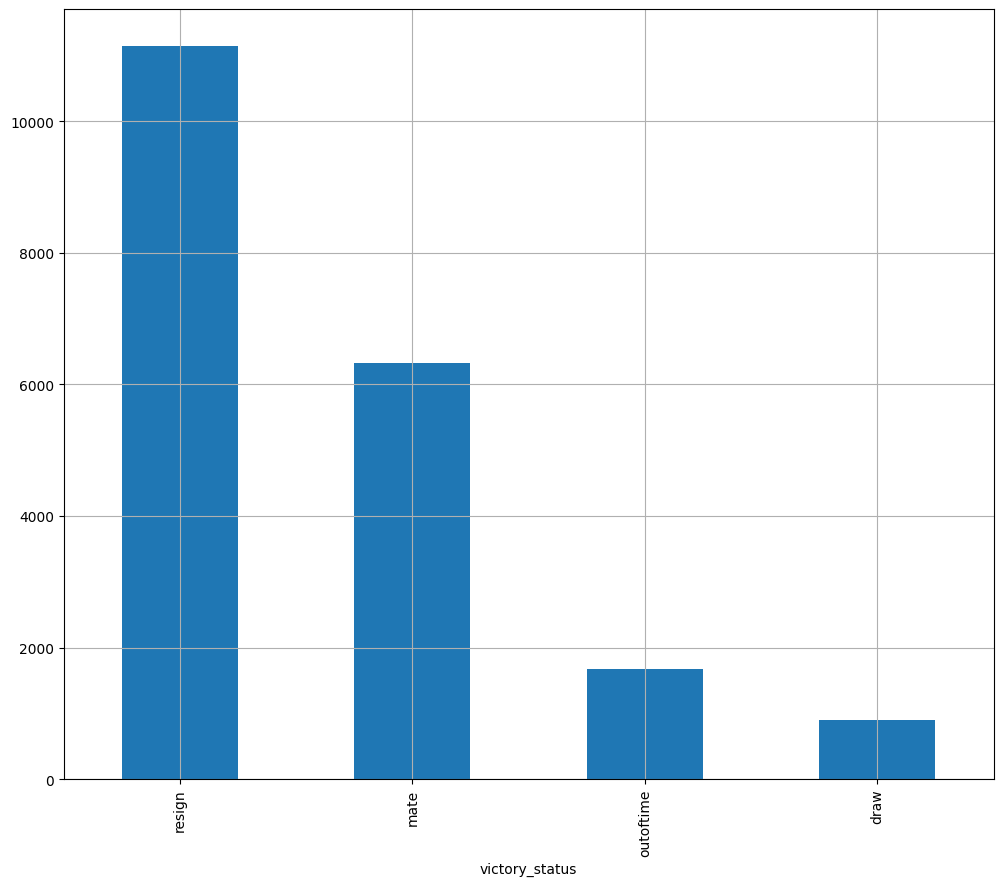

In [12]:
#distribution of victory staus
victory = data['victory_status'].value_counts()
victory.plot(kind='bar', figsize=(12, 10))
plt.grid(True)

In [13]:
victory

victory_status
resign       11147
mate          6325
outoftime     1680
draw           906
Name: count, dtype: int64

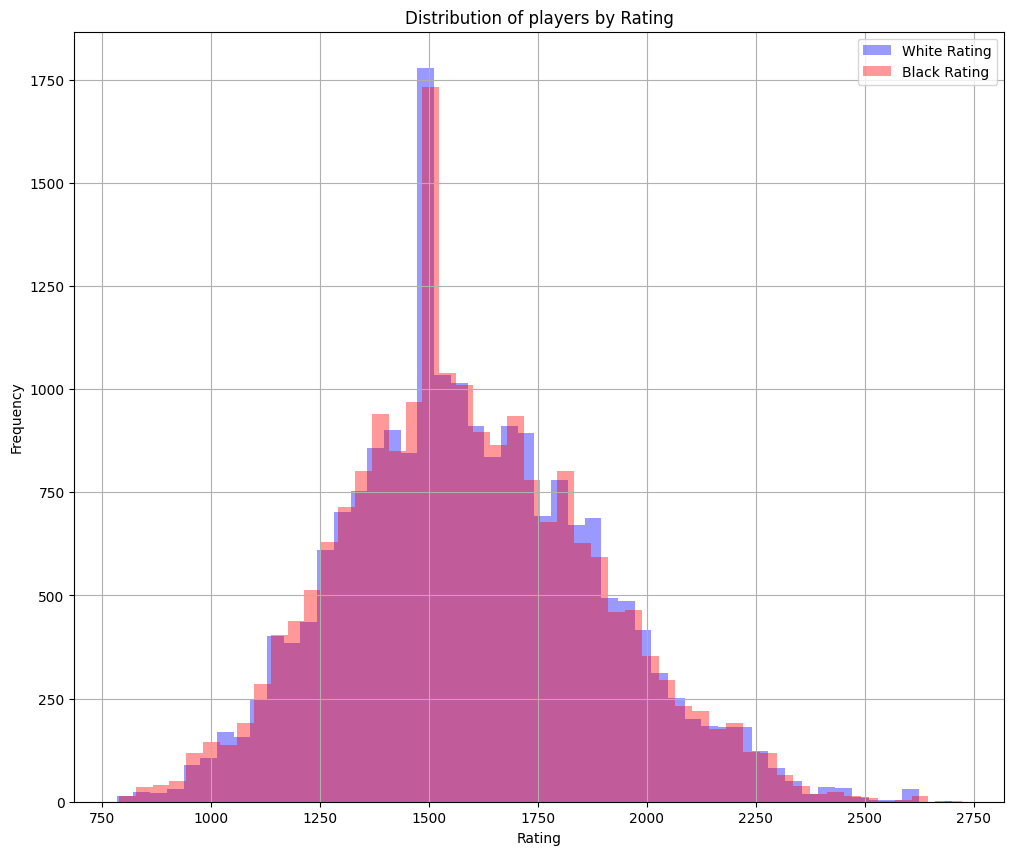

In [14]:
#distribution of players by ratings
plt.figure(figsize=(12, 10))
plt.hist(data['white_rating'], bins=50, color='blue', alpha=0.4, label='White Rating')
plt.hist(data['black_rating'], bins=50, color='Red', alpha=0.4, label='Black Rating')
plt.xlabel('Rating')
plt.ylabel("Frequency")
plt.title('Distribution of players by Rating')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [15]:
#clean the opening column
import re

def clean_opening(opening):
    #split based on #, | and : and pick the first part only
    opening = opening.split('#')[0]
    opening = opening.split('|')[0]
    opening = opening.split(':')[0]
    #sustitute words like Accepted or Decilined or digits with empty strings
    opening = re.sub(r'Accepted|Declined|\d+', '', opening)
    #strip of trailing white speaces
    return opening.strip()

data['opening_name'] = data['opening_name'].apply(clean_opening)

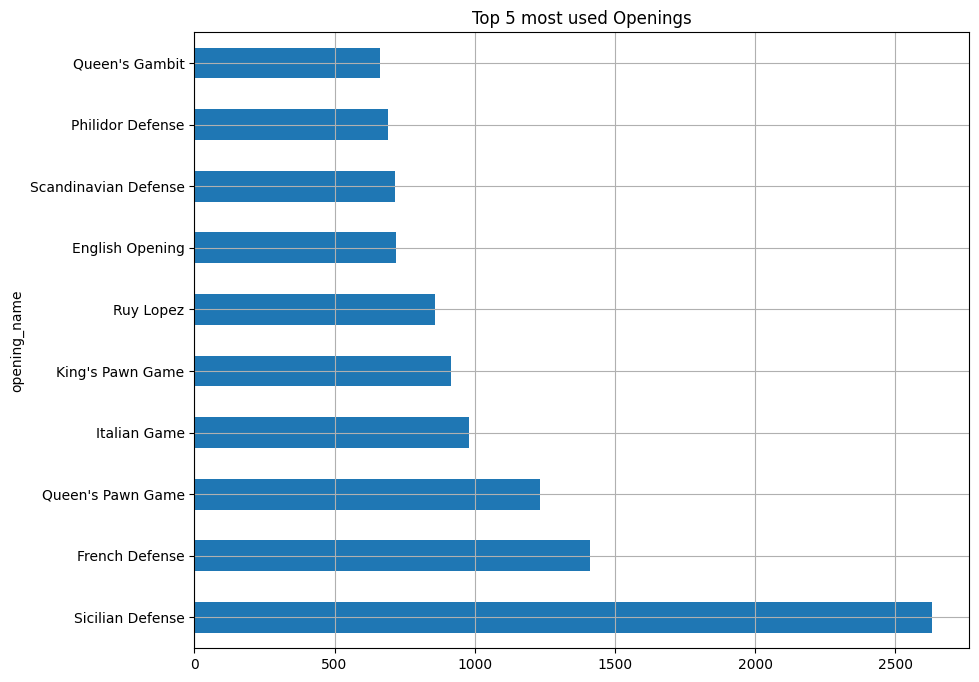

In [16]:
#most common openings
top_10 = data['opening_name'].value_counts().nlargest(10)
top_10.plot(kind='barh', figsize=(10,8))
plt.title("Top 5 most used Openings")
plt.grid(True)

From the visualization above we can conclude that Sicilian Defence is the most common in this data set

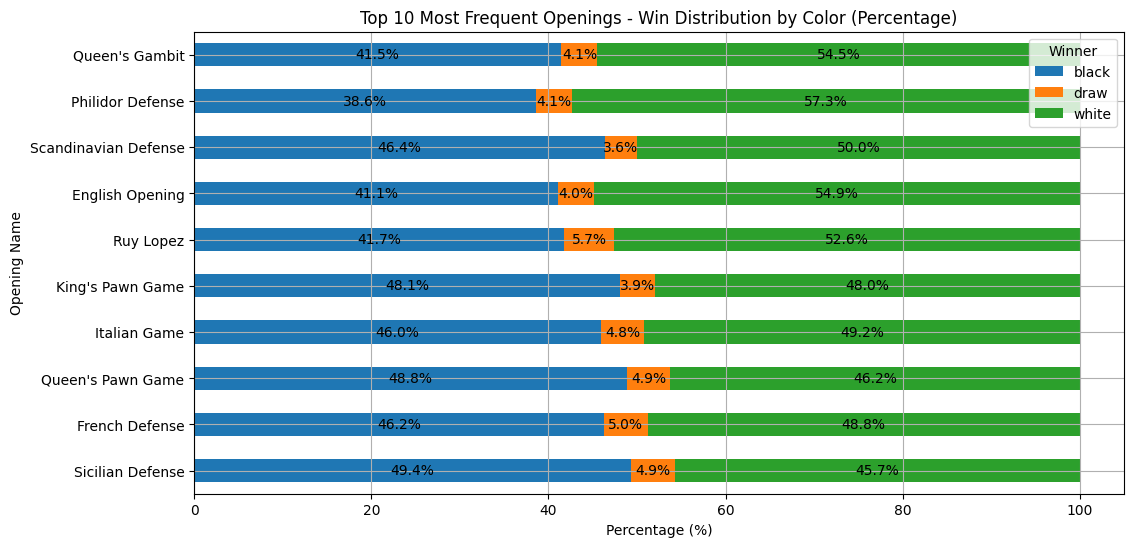

In [17]:
openings_by_color = data.groupby(['opening_name', 'winner']).size().unstack(fill_value=0)


top_openings_by_color = openings_by_color.loc[openings_by_color.sum(axis=1).nlargest(10).index]

# Calculate percentage for each winner category within each opening
top_openings_by_color_percentage = top_openings_by_color.div(top_openings_by_color.sum(axis=1), axis=0) * 100


ax = top_openings_by_color_percentage.plot(kind='barh', stacked=True, figsize=(12, 6))


for i in range(len(top_openings_by_color_percentage)):
    cumulative_sum = 0  # This will keep track of the cumulative sum for each bar
    for j, winner in enumerate(top_openings_by_color_percentage.columns):
        width = top_openings_by_color_percentage.iloc[i, j]  # The percentage value for this segment
        if width > 0:  # Only annotate non-zero values
            ax.annotate(f'{width:.1f}%', 
                        xy=(cumulative_sum + width / 2, i),  # Position at the middle of the segment
                        ha='center', va='center')
            cumulative_sum += width  

plt.title('Top 10 Most Frequent Openings - Win Distribution by Color (Percentage)')
plt.xlabel('Percentage (%)')
plt.ylabel('Opening Name')
plt.grid(True)
plt.legend(title='Winner')
plt.show()

From this visual we can conclude that Sicilian Defense gives black more advantage than other openings, while Philidor defnense seem to be the best opening for white. Also, draws are more frequent in openings like Ruy lopez and French Defense

C:\Users\HP\AppData\Local\Temp\ipykernel_6224\1924421670.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_turns_victory_status.values, y=avg_turns_victory_status.index, palette="viridis")


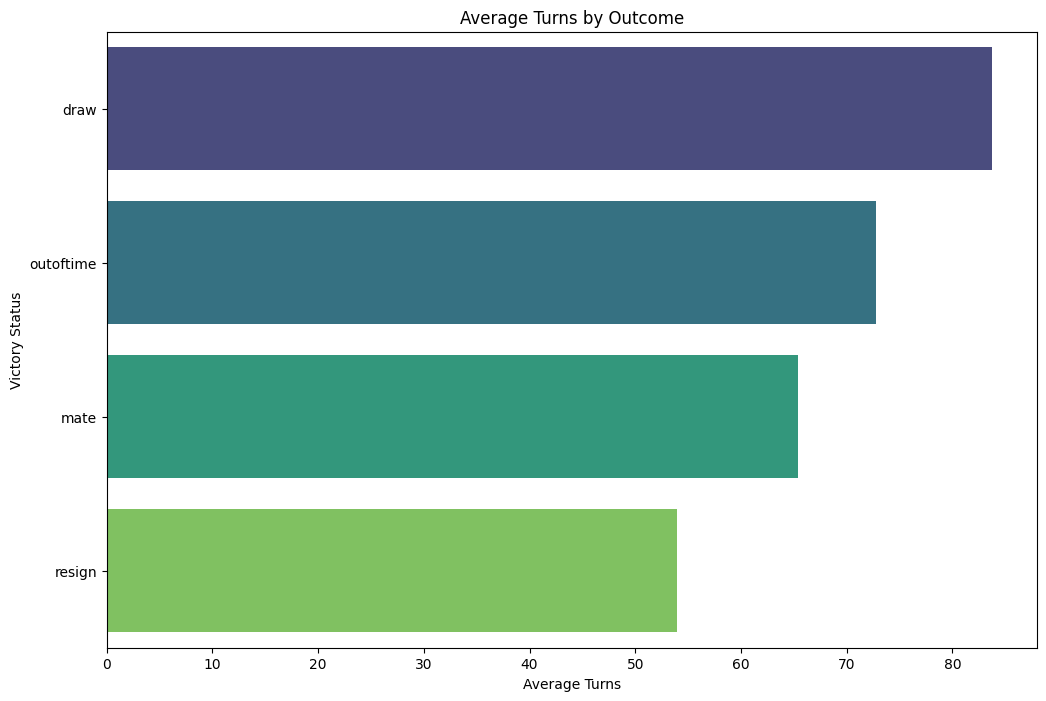

In [18]:
#average turns vs victory status
avg_turns_victory_status = data.groupby(['victory_status'])['turns'].mean().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_turns_victory_status.values, y=avg_turns_victory_status.index, palette="viridis")
plt.title("Average Turns by Outcome")
plt.xlabel("Average Turns")
plt.ylabel("Victory Status")
plt.show()

In [19]:
avg_turns_victory_status.values

array([83.78145695, 72.74285714, 65.41501976, 53.91253252])

In [20]:
#opeinn preferred by top players
#set the threshold for top-rated players
rating_threshold = 2000

#filter for rating threshold
top_rated_players = data[(data['white_rating'] > rating_threshold) | (data['black_rating'] > rating_threshold)]

#count the number of time each opening was used
top_openings = top_rated_players['opening_name'].value_counts()

top_openings.head(10)

opening_name
Sicilian Defense        491
French Defense          197
Queen's Pawn Game       152
Ruy Lopez               149
English Opening         123
Caro-Kann Defense       112
Italian Game            107
Queen's Gambit          106
Scandinavian Defense     89
Indian Game              65
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_6224\2856195125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings.head(10).values, y=top_openings.head(10).index, palette='coolwarm')


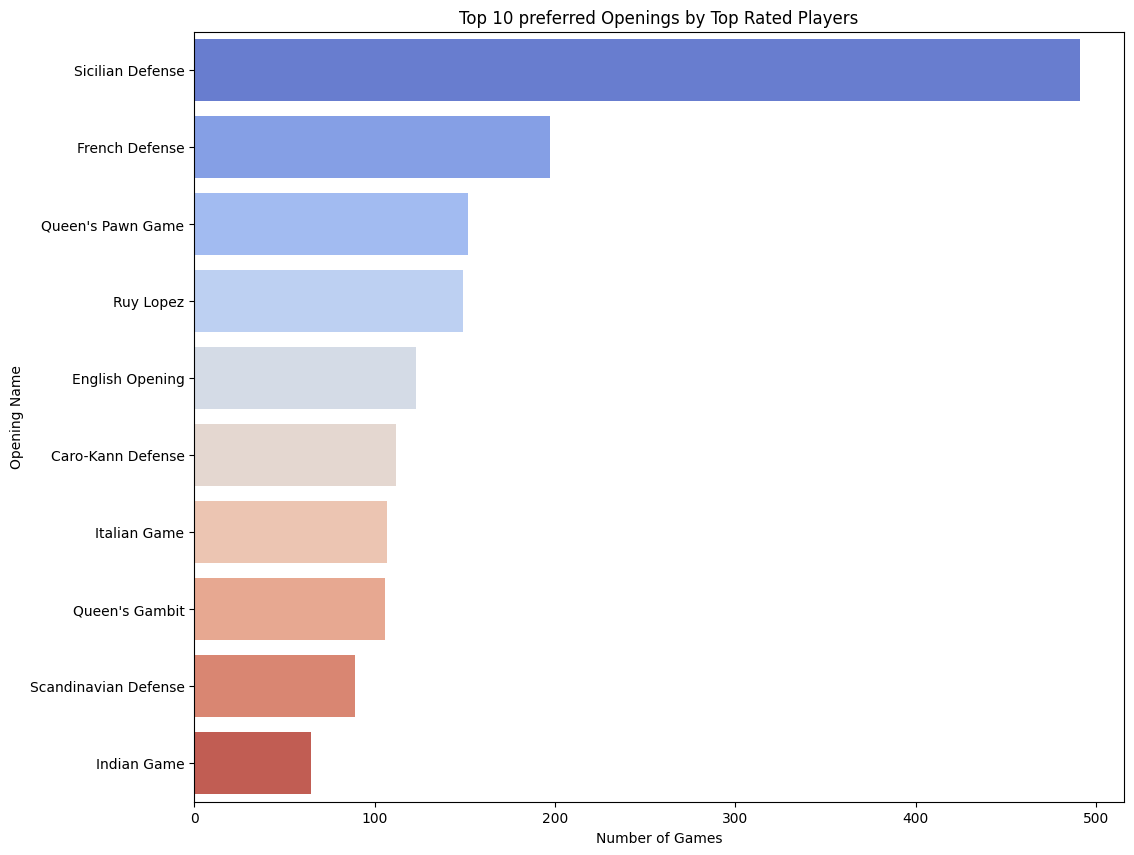

In [21]:
#visualize the opeing preferred byt top players

plt.figure(figsize=(12, 10))
sns.barplot(x=top_openings.head(10).values, y=top_openings.head(10).index, palette='coolwarm')
plt.title('Top 10 preferred Openings by Top Rated Players')
plt.xlabel('Number of Games')
plt.ylabel('Opening Name')
plt.show()

Sicilian Defence is the most preferred opening by top rated players

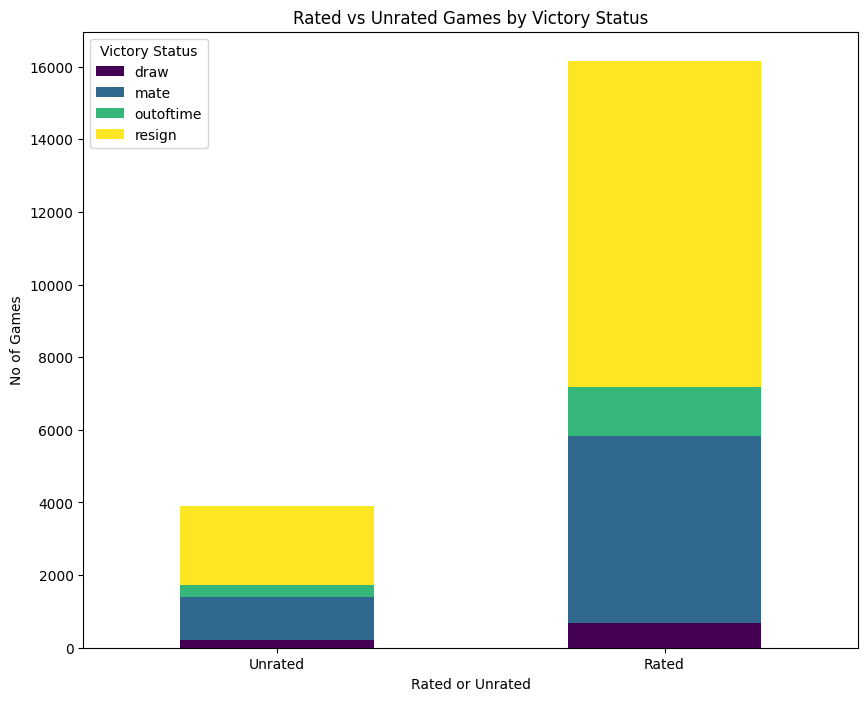

In [22]:
#rated games vs victory status
#group the data

rated_vs_victory = data.groupby(['rated', 'victory_status']).size().unstack(fill_value=0)
rated_vs_victory.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='viridis')
plt.title('Rated vs Unrated Games by Victory Status')
plt.xlabel('Rated or Unrated')
plt.ylabel('No of Games')
plt.xticks(ticks=[0,1], labels=['Unrated', 'Rated'], rotation=0)
plt.legend(title='Victory Status', loc='upper left')
plt.show()

In [23]:
rated_vs_victory

victory_status,draw,mate,outoftime,resign
rated,,,,
False,225,1179,321,2178
True,681,5146,1359,8969


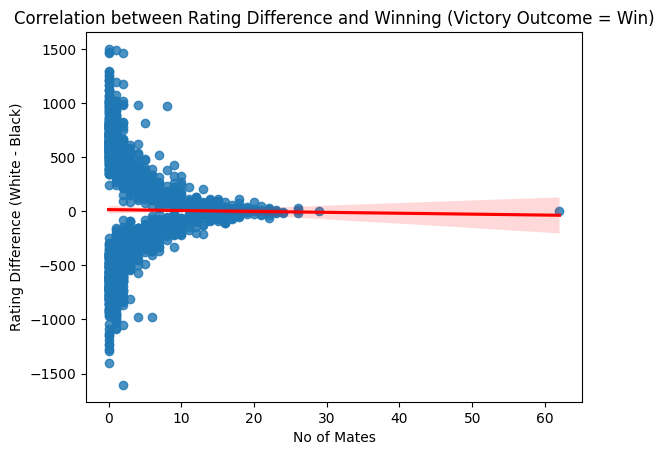

In [24]:
#check if higher rating correlates to wining
import numpy as np
data['rating_difference'] = data['white_rating'] - data['black_rating']

rating_diff = data.groupby(['rating_difference', 'victory_status']).size().unstack(fill_value=0)

#scatter plot to check the correlation between rating differnce and winning
sns.regplot(data=rating_diff , x=rating_diff['mate'], y=rating_diff.index, scatter=True, line_kws={'color':'red'})
plt.title("Correlation between Rating Difference and Winning (Victory Outcome = Win)")
plt.xlabel("No of Mates")
plt.ylabel("Rating Difference (White - Black)")
plt.show()

The red trendline suggests negative correlation between the number of mates and the rating difference. This suugests that games with larger rating difference tend to end with fewer mates. <br> 
This suggests that there are fewer mates where the rating difference is greater than 500. Conversely, games with closer rating difference show higher number of checkmates.

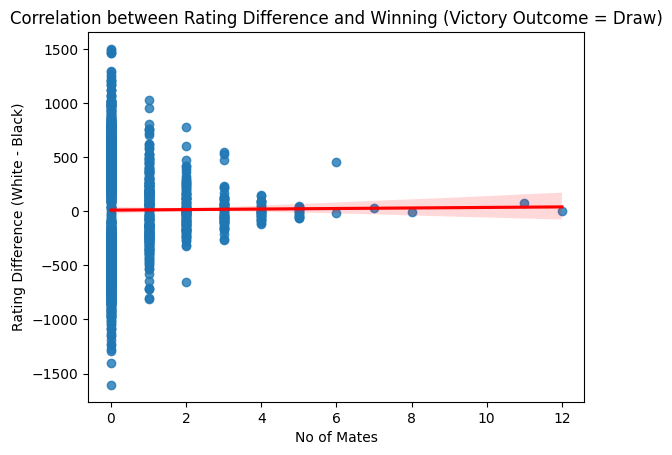

In [25]:
sns.regplot(data=rating_diff , x=rating_diff['draw'], y=rating_diff.index, scatter=True, line_kws={'color':'red'})
plt.title("Correlation between Rating Difference and Winning (Victory Outcome = Draw)")
plt.xlabel("No of Mates")
plt.ylabel("Rating Difference (White - Black)")
plt.show()

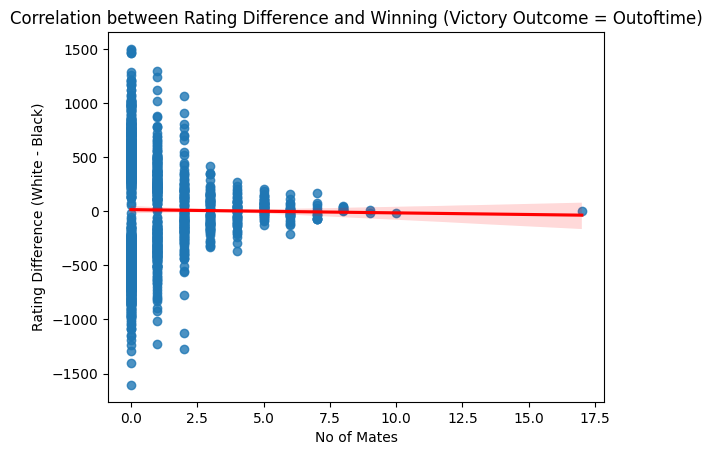

In [26]:
sns.regplot(data=rating_diff , x=rating_diff['outoftime'], y=rating_diff.index, scatter=True, line_kws={'color':'red'})
plt.title("Correlation between Rating Difference and Winning (Victory Outcome = Outoftime)")
plt.xlabel("No of Mates")
plt.ylabel("Rating Difference (White - Black)")
plt.show()

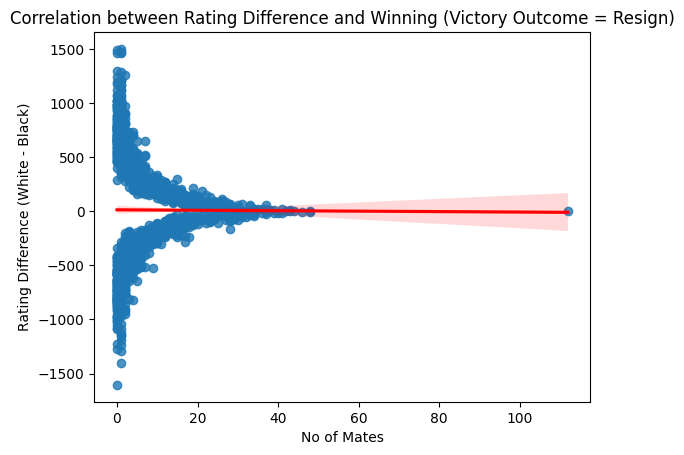

In [27]:
sns.regplot(data=rating_diff , x=rating_diff['resign'], y=rating_diff.index, scatter=True, line_kws={'color':'red'})
plt.title("Correlation between Rating Difference and Winning (Victory Outcome = Resign)")
plt.xlabel("No of Mates")
plt.ylabel("Rating Difference (White - Black)")
plt.show()

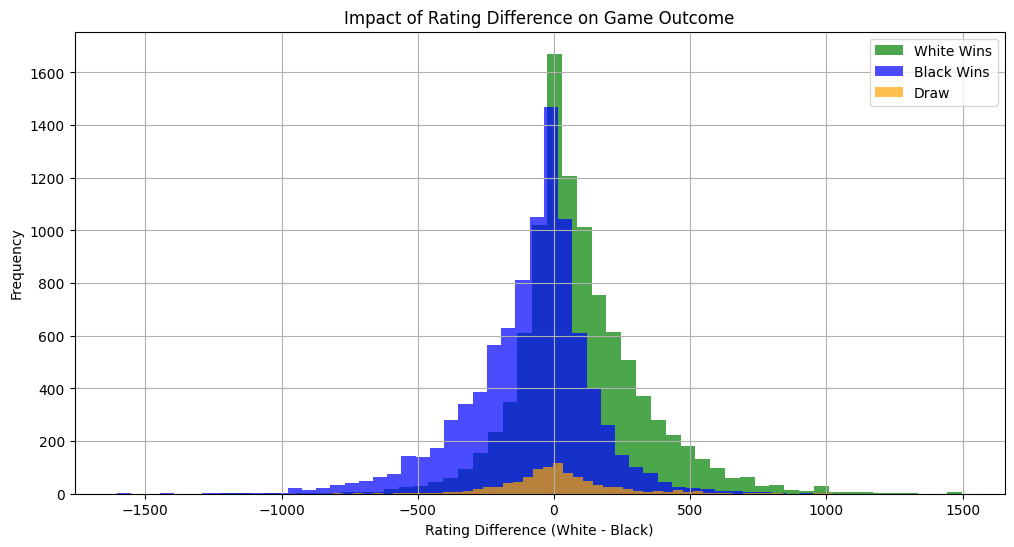

In [28]:
# Plot rating difference based on winner
plt.figure(figsize=(12, 6))
data[data['winner'] == 'white']['rating_difference'].plot(kind='hist', bins=50, alpha=0.7, label='White Wins', color='green')
data[data['winner'] == 'black']['rating_difference'].plot(kind='hist', bins=50, alpha=0.7, label='Black Wins', color='blue')
data[data['winner'] == 'draw']['rating_difference'].plot(kind='hist', bins=50, alpha=0.7, label='Draw', color='orange')
plt.xlabel('Rating Difference (White - Black)')
plt.ylabel('Frequency')
plt.title('Impact of Rating Difference on Game Outcome')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


this typically shows that more often than not, the player with the more rating wins the game and in cases where the rating of both players are the same, the white player often wins with the opening advantage.

In [29]:
#correlation between rating and win_rate
data['white_wins'] = data['winner'].apply(lambda x: 1 if x == 'white' else (-1 if x =='black' else 0))

corr_white = data[['white_rating', 'white_wins']].corr().iloc[0,1]
corr_black = data[['black_rating', 'white_wins']].corr().iloc[0,1]

print(f"White corr: {corr_white}, Black corr: {corr_black}")

White corr: 0.14170011586340436, Black corr: -0.16681533252120684


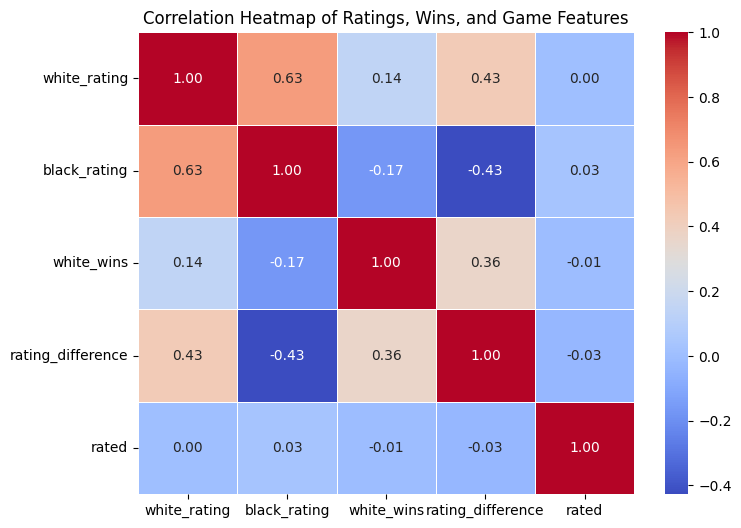

In [30]:
relevant_columns = data[['white_rating', 'black_rating', 'white_wins', 'rating_difference', 'rated']]

# Calculate the correlation matrix
correlation_matrix = relevant_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Ratings, Wins, and Game Features')
plt.show()

Positive correlation between black_rating and white_rating shows that in a game it is highly likely for similarly rated players to paly against each other. <br>
the correlation between white wins and white rating suggests that highly rated white players tend to win slightly more often. <br>

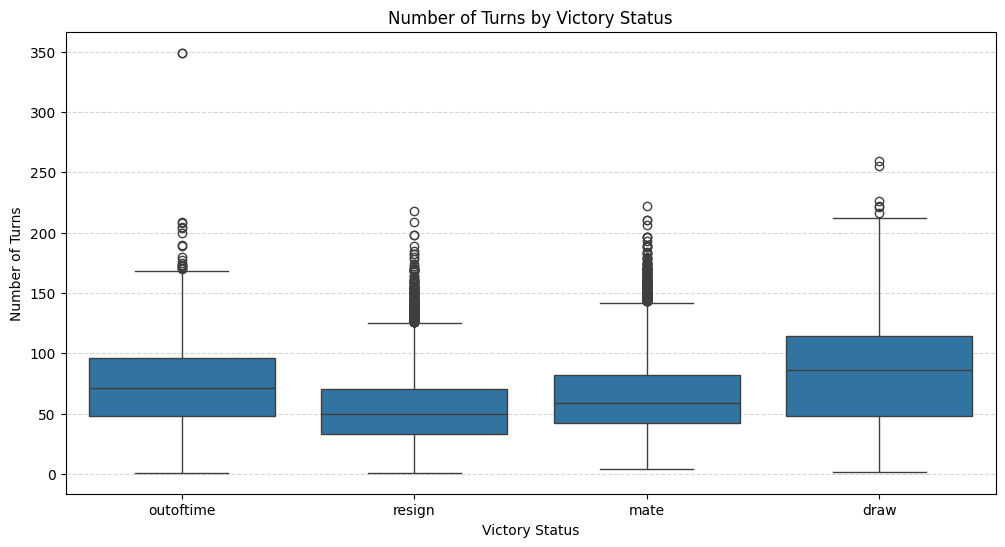

In [31]:
#number of truns vs victory outcome
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='victory_status', y='turns')
plt.title("Number of Turns by Victory Status")
plt.xlabel("Victory Status")
plt.ylabel("Number of Turns")
#plt.legend(title="Winner")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

this visualization shows that games that end in resign and mate often have fewer no of moves and are often predictable while games that end in draw have longer number of moves and often end in a deadlock.
Most games, except those that end in resign often have at least 50 moves before then end of the game.

<h3>Feature Engineering<h3>

In [32]:
#split the time increment column into two columns
data[['game_time', 'time_increment_per_move']] = data['time_increment'].str.split('+', expand=True)
data.head()

,rated,start_time,end_time,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration,rating_difference,white_wins,game_time,time_increment_per_move
game_id,,,,,,,,,,,,,,,,,,,,
TZJHLljE,False,1504210000000,1504210000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense,5,0,309,1,15,2
l1NXvwaE,True,1504130000000,1504130000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense,4,0,61,-1,5,10
mIICvQHh,True,1504130000000,1504130000000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game,3,0,-4,1,5,10
kWKvrqYL,True,1504110000000,1504110000000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game,3,0,-15,1,20,0
9tXo1AUZ,True,1504030000000,1504030000000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0,54,1,30,3


In [33]:
#change the type pf time increment per move and game time
data['time_increment_per_move'] = data['time_increment_per_move'].astype(int)
data['game_time'] = data['game_time'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20058 entries, TZJHLljE to N8G2JHGG
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   rated                    20058 non-null  bool  
 1   start_time               20058 non-null  int64 
 2   end_time                 20058 non-null  int64 
 3   turns                    20058 non-null  int64 
 4   victory_status           20058 non-null  object
 5   winner                   20058 non-null  object
 6   time_increment           20058 non-null  object
 7   white_id                 20058 non-null  object
 8   white_rating             20058 non-null  int64 
 9   black_id                 20058 non-null  object
 10  black_rating             20058 non-null  int64 
 11  moves                    20058 non-null  object
 12  opening_eco              20058 non-null  object
 13  opening_name             20058 non-null  object
 14  opening_ply              20058 no

In [34]:
#get the estimated game duration based on the game time and the time increment
data['estimated_game_duration'] = (data['game_time'] * 60)  + (data['time_increment_per_move'] * data['turns'])
data.head()

,rated,start_time,end_time,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,...,moves,opening_eco,opening_name,opening_ply,game_duration,rating_difference,white_wins,game_time,time_increment_per_move,estimated_game_duration
game_id,,,,,,,,,,,,,,,,,,,,,
TZJHLljE,False,1504210000000,1504210000000,13,outoftime,white,15+2,bourgris,1500,a-00,...,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense,5,0,309,1,15,2,926
l1NXvwaE,True,1504130000000,1504130000000,16,resign,black,5+10,a-00,1322,skinnerua,...,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense,4,0,61,-1,5,10,460
mIICvQHh,True,1504130000000,1504130000000,61,mate,white,5+10,ischia,1496,a-00,...,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game,3,0,-4,1,5,10,910
kWKvrqYL,True,1504110000000,1504110000000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,...,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game,3,0,-15,1,20,0,1200
9tXo1AUZ,True,1504030000000,1504030000000,95,mate,white,30+3,nik221107,1523,adivanov2009,...,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0,54,1,30,3,2085


In [35]:
#classify time control into game type
def classify_time_control(row):
    if row['game_time'] <= 2 and row['time_increment_per_move'] <= 1:
        return 'bullet'
    elif row['game_time'] <= 10 and row['time_increment_per_move'] <= 5:
        return 'blitz'
    elif row['game_time'] <= 15 and row['time_increment_per_move'] <= 10:
        return 'rapid'
    else:
        return 'classical'
    
data['time_control_type'] = data.apply(classify_time_control, axis=1)
data.head()

,rated,start_time,end_time,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,...,opening_eco,opening_name,opening_ply,game_duration,rating_difference,white_wins,game_time,time_increment_per_move,estimated_game_duration,time_control_type
game_id,,,,,,,,,,,,,,,,,,,,,
TZJHLljE,False,1504210000000,1504210000000,13,outoftime,white,15+2,bourgris,1500,a-00,...,D10,Slav Defense,5,0,309,1,15,2,926,rapid
l1NXvwaE,True,1504130000000,1504130000000,16,resign,black,5+10,a-00,1322,skinnerua,...,B00,Nimzowitsch Defense,4,0,61,-1,5,10,460,rapid
mIICvQHh,True,1504130000000,1504130000000,61,mate,white,5+10,ischia,1496,a-00,...,C20,King's Pawn Game,3,0,-4,1,5,10,910,rapid
kWKvrqYL,True,1504110000000,1504110000000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,...,D02,Queen's Pawn Game,3,0,-15,1,20,0,1200,classical
9tXo1AUZ,True,1504030000000,1504030000000,95,mate,white,30+3,nik221107,1523,adivanov2009,...,C41,Philidor Defense,5,0,54,1,30,3,2085,classical


Text(0.5, 1.0, 'Distribution of Game types by Time Control')

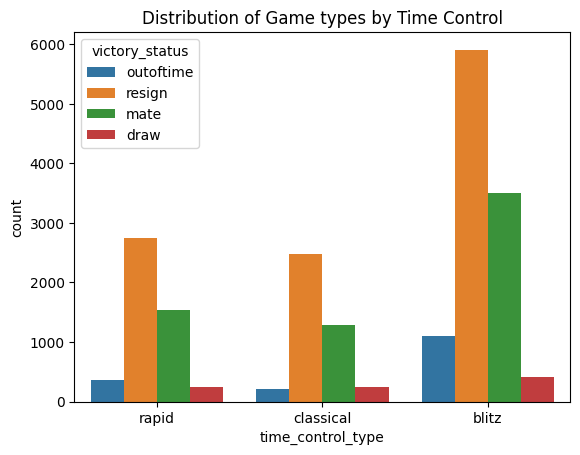

In [36]:
#distribution of time control type
sns.countplot(data, x='time_control_type', hue='victory_status')
plt.title("Distribution of Game types by Time Control")

Text(0.5, 1.0, 'Winner by Time control')

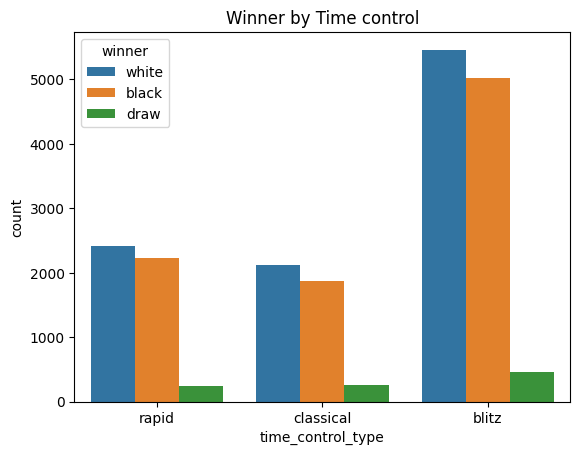

In [37]:
#victory outcome by time control
sns.countplot(data, x='time_control_type', hue='winner')
plt.title('Winner by Time control')

Text(0.5, 1.0, 'Estimated game duration by No of Moves')

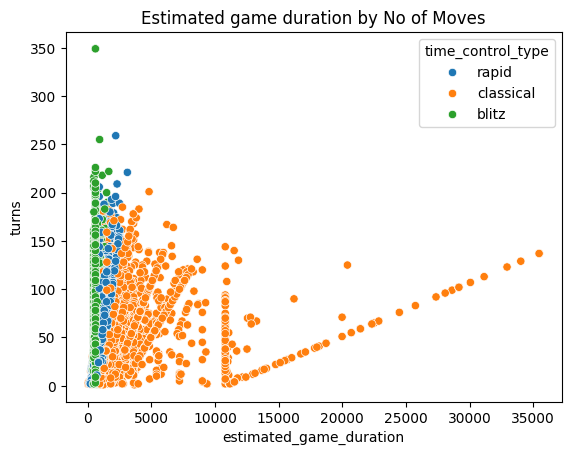

In [38]:
#number of moves vs total time
sns.scatterplot(data, x='estimated_game_duration', y='turns', hue='time_control_type')
plt.title("Estimated game duration by No of Moves")

As the number of turns increases the game duration also increases.

In [39]:
redundant_cols = ['start_time', 'end_time', 'time_increment', 'opening_name', 'white_wins', 'black_id', 'white_id']
data.drop(columns=redundant_cols, axis=1, inplace=True)
data.columns

Index(['rated', 'turns', 'victory_status', 'winner', 'white_rating',
       'black_rating', 'moves', 'opening_eco', 'opening_ply', 'game_duration',
       'rating_difference', 'game_time', 'time_increment_per_move',
       'estimated_game_duration', 'time_control_type'],
      dtype='object')

Natural Language Processing(NLP)

In [40]:
#bag of words, convert each unique move into a sparse matix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
#bow - bag of words
moves_bow = vectorizer.fit_transform(data['moves'])
moves_bow

<20058x2688 sparse matrix of type '<class 'numpy.int64'>'
	with 1056161 stored elements in Compressed Sparse Row format>

In [41]:
#sequence encoding
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
moves_tfidf = tfidf.fit_transform(data.moves)

In [42]:
#n_grams to capture move patterns
bigram_vectorizer = CountVectorizer(ngram_range=(2,2))
moves_bigram = bigram_vectorizer.fit_transform(data.moves)

Train Test Split

In [43]:
#convert to dataframe
moves_bow_df = pd.DataFrame.sparse.from_spmatrix(moves_bow)

In [44]:
data.drop('moves', axis=1, inplace=True)
data = data.join(moves_bow_df)

In [45]:
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
y = data['winner']
X = data.drop(columns=['winner'], axis=1)

In [46]:
X['rated'] = X['rated'].apply(lambda x: 1 if x == 'True' else 0)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, shuffle=True)

In [48]:
#separate the numeric and the object cols
cat_cols = X.select_dtypes(include=['object'])
cat_cols = cat_cols.columns
cat_cols

Index(['victory_status', 'opening_eco', 'time_control_type'], dtype='object')

In [49]:
#encoding the data
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
encoder = TargetEncoder()
X_train_encoded = encoder.fit_transform(X_train[cat_cols], y_train_encoded)
X_test_encoded = encoder.transform(X_test[cat_cols])

In [50]:
#jion the cat cols to the num cols
num_cols = X.select_dtypes(exclude='object').columns
X_train_joined = X[num_cols].join(X_train_encoded)
X_test_joined = X[num_cols].join(X_test_encoded)

In [53]:
X_train_joined.head()

,rated,turns,white_rating,black_rating,opening_ply,game_duration,rating_difference,game_time,time_increment_per_move,estimated_game_duration,...,2681,2682,2683,2684,2685,2686,2687,victory_status,opening_eco,time_control_type
game_id,,,,,,,,,,,,,,,,,,,,,
005lW0Xz,0,37,1500,1479,10,371839,21,10,5,785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
009mKOEz,0,36,1890,1838,4,287937,52,8,0,480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.043242,1.178176,1.037869
00R4UOcU,0,54,1207,1588,7,0,-381,20,5,1470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050764,1.037037,1.048970
00dSgZj7,0,114,1689,2201,3,0,-512,8,0,480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
018JyEeA,0,47,1568,1561,4,770082,7,20,10,1670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050764,1.213166,1.048970


In [56]:
#convert all the column names to string
X_train_joined.columns = X_train_joined.columns.astype(str)
X_test_joined.columns = X_test_joined.columns.astype(str)

TypeError: Index.astype() got an unexpected keyword argument 'inplace'

In [57]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_joined)
X_test_scaled = scaler.fit_transform(X_test_joined)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:823: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1108: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1113: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1133: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:823: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.wa